# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
9. [Classification Models](#i_ID)
    
    9.4 [Decision Tree](#i4_ID)

## <a id="i_ID">9. Classification Models</a>

### <a id="i4_ID">9.4 Decision Tree</a>

### Without RFE or PCA

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
# Train a decision tree model on the train set
dtree = DecisionTreeClassifier(random_state=26)
dtree.fit(X_train_sc_smote, y_train_smote)

DecisionTreeClassifier(random_state=26)

In [495]:
# Make class predictions for the test set
y_pred_class = dtree.predict(X_test_sc)

In [496]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70636,   184],
       [   26,    86]], dtype=int64)

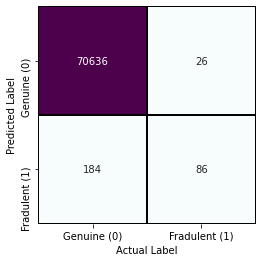

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [498]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70636   184]
 [   26    86]]
True Positive:  86
True Negative:  70636
False Positive:  184
False Negative:  26


In [499]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9970394180341736


In [500]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.002960581965826381


In [501]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7678571428571429


In [502]:
# Specificity
print(TN / float(TN + FP))

0.9974018638802599


In [503]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.31851851851851853


In [504]:
# False Positive Rate
print(FP / float(TN + FP))

0.0025981361197401865


In [505]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.4502617801047121


In [506]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8826295033687014


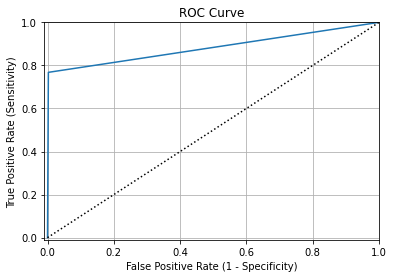

In [509]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [510]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.32      0.77      0.45       112

    accuracy                           1.00     70932
   macro avg       0.66      0.88      0.72     70932
weighted avg       1.00      1.00      1.00     70932



In [207]:
# Import graphviz and tree libraries
import graphviz
from sklearn import tree

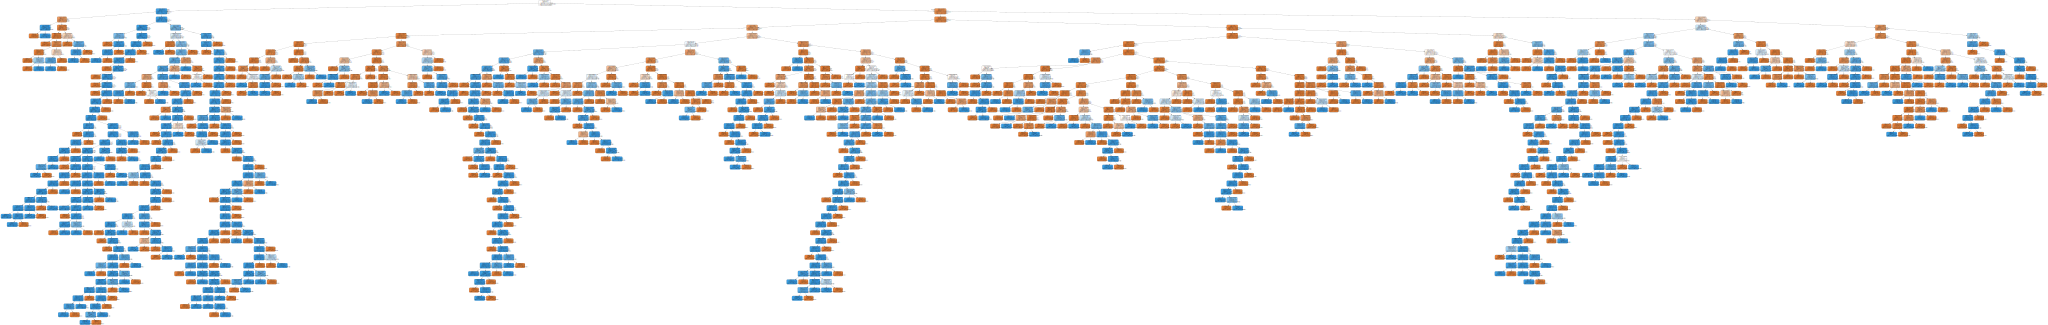

In [212]:
# Create a decision tree
data = tree.export_graphviz(dtree, out_file=None, feature_names=X_train_sc_smote.columns, 
                            class_names=['Genuine (0)', 'Fraudulent (1)'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

### With RFE

In [213]:
# Train a decision tree model on the train set
dtree = DecisionTreeClassifier(random_state=26)
dtree.fit(X_train_rfe, y_train_smote)

DecisionTreeClassifier(random_state=26)

In [512]:
# Make class predictions for the test set
y_pred_class = dtree.predict(X_test_rfe)

In [513]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70642,   178],
       [   27,    85]], dtype=int64)

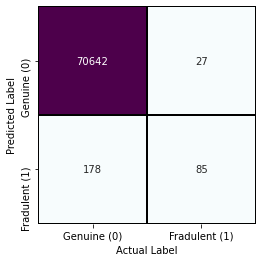

In [514]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [515]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70642   178]
 [   27    85]]
True Positive:  85
True Negative:  70642
False Positive:  178
False Negative:  27


In [516]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.997109908080979


In [517]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0028900919190210095


In [518]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7589285714285714


In [519]:
# Specificity
print(TN / float(TN + FP))

0.9974865857102514


In [520]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.3231939163498099


In [521]:
# False Positive Rate
print(FP / float(TN + FP))

0.0025134142897486585


In [522]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.4533333333333333


In [523]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8782075785694113


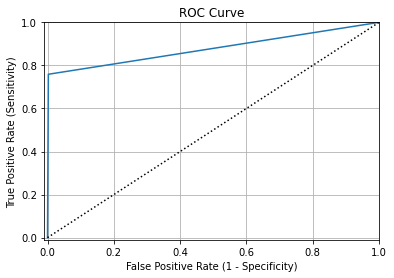

In [525]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [526]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.32      0.76      0.45       112

    accuracy                           1.00     70932
   macro avg       0.66      0.88      0.73     70932
weighted avg       1.00      1.00      1.00     70932



In [215]:
# Create a decision tree
data = tree.export_graphviz(dtree, out_file=None, feature_names=X_train_rfe.columns, 
                            class_names=['Genuine (0)', 'Fraudulent (1)'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

### With PCA

In [216]:
# Train a decision tree model on the train set
dtree = DecisionTreeClassifier(random_state=26)
dtree.fit(X_smote_pca_15, y_train_smote)

DecisionTreeClassifier(random_state=26)

In [528]:
# Make class predictions for the test set
y_pred_class = dtree.predict(X_test_pca_15)

In [529]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70631,   189],
       [   24,    88]], dtype=int64)

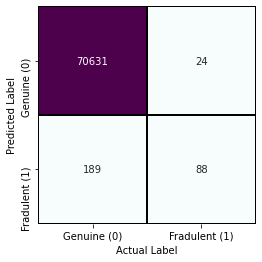

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [531]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70631   189]
 [   24    88]]
True Positive:  88
True Negative:  70631
False Positive:  189
False Negative:  24


In [532]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9969971240060903


In [533]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0030028759939096927


In [534]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.7857142857142857


In [535]:
# Specificity
print(TN / float(TN + FP))

0.9973312623552669


In [536]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.3176895306859206


In [537]:
# False Positive Rate
print(FP / float(TN + FP))

0.0026687376447331263


In [538]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.45244215938303345


In [539]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.8915227740347763


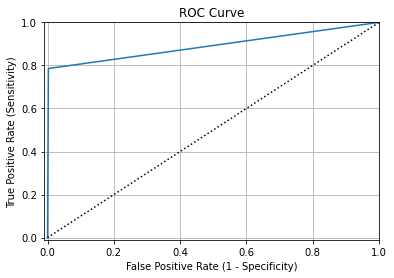

In [541]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [542]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.32      0.79      0.45       112

    accuracy                           1.00     70932
   macro avg       0.66      0.89      0.73     70932
weighted avg       1.00      1.00      1.00     70932



In [218]:
# Create a decision tree
data = tree.export_graphviz(dtree, out_file=None, feature_names=['PC1', 'PC2', 'PC3' ,'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 
                                                                 'PC9','PC10','PC11', 'PC12', 'PC13' ,'PC14', 'PC15'], 
                            class_names=['Genuine (0)', 'Fraudulent (1)'], filled=True, 
                            rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph